<a href="https://colab.research.google.com/github/Marvin9516008/Lab3/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [71]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [72]:
data_path = '/content/drive/MyDrive/trainlab3.csv'
dataset = pd.read_csv(data_path)
dataset.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [73]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [74]:
dataset.date = pd.to_datetime(dataset.date)

In [75]:
dataset = dataset.set_index("date")
dataset.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


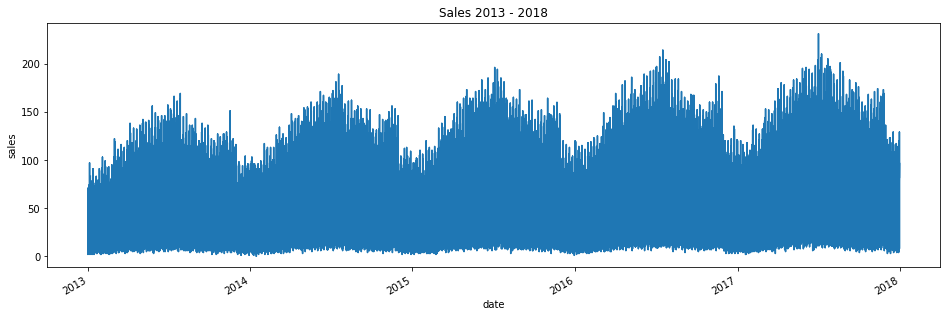

In [76]:
ax = dataset['sales'].plot(figsize = (16,5), title = "Sales 2013 - 2018")
ax.set(xlabel='date', ylabel='sales');

In [77]:
df = pd.DataFrame(dataset)

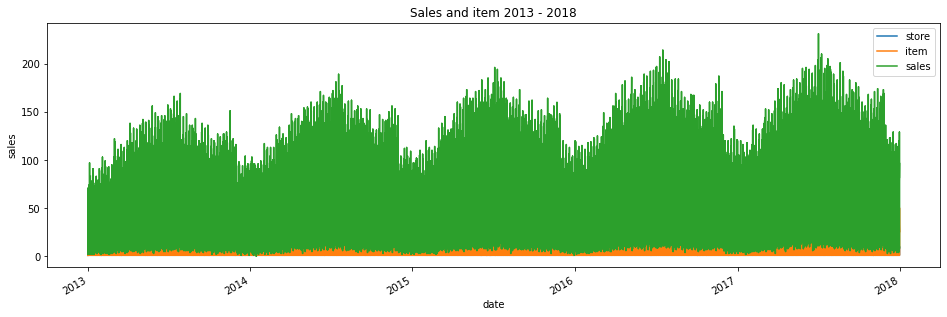

In [78]:
ax = df.plot(figsize = (16,5), title = "Sales and item 2013 - 2018")
ax.set(xlabel='date', ylabel='sales');

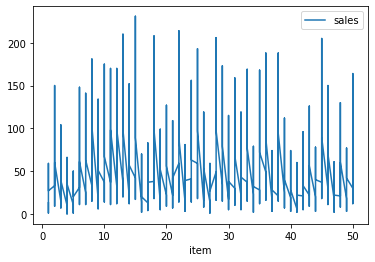

In [79]:
fig, ax = plt.subplots() # Create the figure and axes object

# Plot the first x and y axes:
df.plot(x = 'item', y = 'sales', ax = ax) 

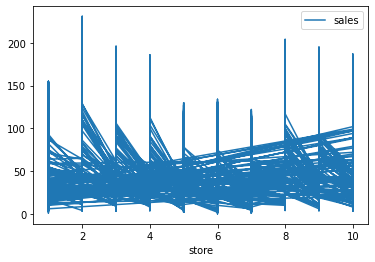

In [80]:
fig, ax = plt.subplots() # Create the figure and axes object

# Plot the first x and y axes:
df.plot(x = 'store', y = 'sales', ax = ax) 

In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
dataTrain_scaled = scaler.fit_transform(df)

In [85]:
X_train = []
Y_train = []

#secuenciamos los datos.
cantidad = dataTrain_scaled.shape[0]
ventana = 60
for i in range(ventana, cantidad):
  X_train.append(dataTrain_scaled[i - ventana: i, 0])
  Y_train.append(dataTrain_scaled[i, 0])

In [86]:
X_train = np.array(X_train)
y_train = np.array(Y_train)

In [87]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) #reshape para entrada en Keras.

In [88]:
X_train

array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       ...,

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]]])

In [89]:
X_train.shape

(912940, 60, 1)

In [90]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [92]:
forecaster = Sequential()

#capa1
forecaster.add(LSTM(input_shape=(X_train.shape[1], 1), units=50, return_sequences=True))

#capa2
forecaster.add(LSTM(units=50, return_sequences=True))

#capa3
forecaster.add(LSTM(units=25, return_sequences=True))

#capa4 - NOTAAAAR :) que la capa previa a la salida, no requiere feedback ya que es el resultado final.
forecaster.add(LSTM(units=75, return_sequences=False))

#capa de salida
forecaster.add(Dense(units=1, activation='relu'))

In [93]:
#parametros de optimización
forecaster.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#parametros de entrenamiento
forecaster.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 12s 122ms/step - loss: 0.0359
Epoch 2/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0034
Epoch 3/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0024
Epoch 4/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0026
Epoch 5/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0021
Epoch 6/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0021
Epoch 7/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0021
Epoch 8/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0020
Epoch 9/100
38/38 [==============================] - 6s 150ms/step - loss: 0.0019
Epoch 10/100
38/38 [==============================] - 8s 203ms/step - loss: 0.0018
Epoch 11/100
38/38 [==============================] - 6s 166ms/step - loss: 0.0017
Epoch 12/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0017
Epoch 13/100

In [ ]:
forecaster.save('/content/drive/MyDrive/Statistical Learning II/RNN/RNN_v1.h5')

In [ ]:
dataTest = pd.read_csv(strDataTest)
dataTest.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [ ]:
real_test_price = dataTest.iloc[:, 1:2].values
real_test_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [ ]:
dataset_total = pd.concat((dataTrain['Open'], dataTest['Open']), axis=0)
dataset_total

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [ ]:
input_test = dataset_total[len(dataset_total) - len(dataTest) - ventana : ].values
input_test = input_test.reshape(-1, 1)
input_test = scaler.transform(input_test)
input_test

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

In [ ]:
cantidad_final = len(input_test)
cantidad_final

80

In [ ]:
X_test = []
for i in range(ventana, cantidad_final):
  X_test.append(input_test[i - ventana:i, 0])

X_test = np.array(X_test)

In [ ]:
X_test.shape

(20, 60)

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
X_test.shape

(20, 60, 1)

In [ ]:
predicciones_rnn = forecaster.predict(X_test)
predicciones_rnn

array([[0.9296946 ],
       [0.9209536 ],
       [0.94070107],
       [0.9312178 ],
       [0.95035493],
       [0.96684366],
       [0.964765  ],
       [0.9596677 ],
       [0.9654809 ],
       [0.964784  ],
       [0.9645069 ],
       [0.96280056],
       [0.96256155],
       [0.9666597 ],
       [0.96661824],
       [0.9958682 ],
       [1.0021734 ],
       [1.0162188 ],
       [1.0069386 ],
       [0.9712656 ]], dtype=float32)

In [ ]:
predicciones_rnn.shape

(20, 1)

In [ ]:
#invertimos noramalizacion
real_predicted_price = scaler.inverse_transform(predicciones_rnn)
real_predicted_price

array([[778.88666],
       [774.1878 ],
       [784.8033 ],
       [779.7054 ],
       [789.9928 ],
       [798.8565 ],
       [797.7391 ],
       [794.99896],
       [798.1239 ],
       [797.74927],
       [797.60034],
       [796.6831 ],
       [796.55457],
       [798.7576 ],
       [798.7353 ],
       [814.45886],
       [817.8483 ],
       [825.39856],
       [820.40985],
       [801.2335 ]], dtype=float32)

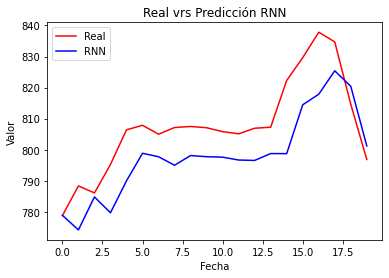

In [ ]:
plt.plot(real_test_price, color="red", label="Real")
plt.plot(real_predicted_price, color="blue", label="RNN")
plt.title("Real vrs Predicción RNN")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.legend()
plt.show()